In [2]:
# Import libraries to start working

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load data for CD45 analysis
data1 = pd.read_csv("/Users/luizmaniero/Documents/DataScience/HMRI_IHC_colab/20250504_CD45_results/cd45_Results_20250504.csv")
data2 = pd.read_csv("/Users/luizmaniero/Documents/DataScience/HMRI_IHC_colab/20250701_CD45_results/cd45_Nuclei_count_20250107.csv")



In [4]:
data2.head()

,Slice,Count,Total Area,Average Size,%Area,Perim.
0,Image_CD45_416_-_20x_BF_05_crop_2_Colour_1_mas...,56,32184,574.714,11.715,87.357
1,Image_CD45_416_-_20x_BF_05_crop_3_Colour_1_mas...,55,25291,459.836,9.206,77.200
2,Image_CD45_416_-_20x_BF_06_crop_1_Colour_1_mas...,54,36138,669.222,13.154,94.873
3,Image_CD45_420_-_20x_BF_06_crop_1_Colour_1_mas...,63,28730,456.032,10.458,77.716
4,Image_CD45_420_-_20x_BF_06_crop_2_Colour_1_mas...,39,26764,686.256,9.742,94.564


In [5]:
data1.head(5)

,,Label,Area,Mean,IntDen,Median,%Area,RawIntDen,MinThr,MaxThr
0,1,Image_CD45_416_-_20x_BF_05_crop_2_Colour_3_mas...,4872,255,1242360,255,1.773,1242360,255,255
1,2,Image_CD45_416_-_20x_BF_05_crop_3_Colour_3_mas...,2002,255,510510,255,0.729,510510,255,255
2,3,Image_CD45_416_-_20x_BF_06_crop_1_Colour_3_mas...,3327,255,848385,255,1.211,848385,255,255
3,4,Image_CD45_420_-_20x_BF_06_crop_1_Colour_3_mas...,1056,255,269280,255,0.384,269280,255,255
4,5,Image_CD45_420_-_20x_BF_06_crop_2_Colour_3_mas...,849,255,216495,255,0.309,216495,255,255


In [6]:
# === 1. Extract the common image ID from filenames ===
data1['ImageID'] = data1['Label'].str.extract(r'(Image_CD45_.*?_crop_\d)')
data2['ImageID'] = data2['Slice'].str.extract(r'(Image_CD45_.*?_crop_\d)')

# === 2. Merge on the extracted ID ===
merged_df = pd.merge(data1, data2, on='ImageID', how='inner', suffixes=('_cd45', '_nuclei'))

# === 3. Save or display the result ===
#merged_df.to_csv("merged_cd45.csv", index=False)

In [7]:
merged_df.head(10)

,,Label,Area,Mean,IntDen,Median,%Area_cd45,RawIntDen,MinThr,MaxThr,ImageID,Slice,Count,Total Area,Average Size,%Area_nuclei,Perim.
0,1,Image_CD45_416_-_20x_BF_05_crop_2_Colour_3_mas...,4872,255,1242360,255,1.773,1242360,255,255,Image_CD45_416_-_20x_BF_05_crop_2,Image_CD45_416_-_20x_BF_05_crop_2_Colour_1_mas...,56,32184,574.714,11.715,87.357
1,2,Image_CD45_416_-_20x_BF_05_crop_3_Colour_3_mas...,2002,255,510510,255,0.729,510510,255,255,Image_CD45_416_-_20x_BF_05_crop_3,Image_CD45_416_-_20x_BF_05_crop_3_Colour_1_mas...,55,25291,459.836,9.206,77.200
2,3,Image_CD45_416_-_20x_BF_06_crop_1_Colour_3_mas...,3327,255,848385,255,1.211,848385,255,255,Image_CD45_416_-_20x_BF_06_crop_1,Image_CD45_416_-_20x_BF_06_crop_1_Colour_1_mas...,54,36138,669.222,13.154,94.873
3,4,Image_CD45_420_-_20x_BF_06_crop_1_Colour_3_mas...,1056,255,269280,255,0.384,269280,255,255,Image_CD45_420_-_20x_BF_06_crop_1,Image_CD45_420_-_20x_BF_06_crop_1_Colour_1_mas...,63,28730,456.032,10.458,77.716
4,5,Image_CD45_420_-_20x_BF_06_crop_2_Colour_3_mas...,849,255,216495,255,0.309,216495,255,255,Image_CD45_420_-_20x_BF_06_crop_2,Image_CD45_420_-_20x_BF_06_crop_2_Colour_1_mas...,39,26764,686.256,9.742,94.564
5,6,Image_CD45_420_-_20x_BF_06_crop_3_Colour_3_mas...,1324,255,337620,255,0.482,337620,255,255,Image_CD45_420_-_20x_BF_06_crop_3,Image_CD45_420_-_20x_BF_06_crop_3_Colour_1_mas...,55,22711,412.927,8.267,74.498
6,7,Image_CD45_428_-_20x_BF_02_crop_1_Colour_3_mas...,8786,255,2240430,255,3.198,2240430,255,255,Image_CD45_428_-_20x_BF_02_crop_1,Image_CD45_428_-_20x_BF_02_crop_1_Colour_1_mas...,42,21768,518.286,7.924,82.311
7,8,Image_CD45_428_-_20x_BF_02_crop_2_Colour_3_mas...,7577,255,1932135,255,2.758,1932135,255,255,Image_CD45_428_-_20x_BF_02_crop_2,Image_CD45_428_-_20x_BF_02_crop_2_Colour_1_mas...,40,23205,580.125,8.447,89.106
8,9,Image_CD45_428_-_20x_BF_02_crop_3_Colour_3_mas...,2911,255,742305,255,1.060,742305,255,255,Image_CD45_428_-_20x_BF_02_crop_3,Image_CD45_428_-_20x_BF_02_crop_3_Colour_1_mas...,46,34145,742.283,12.429,98.314
9,10,Image_CD45_431_-_20x_BF_01_crop_1_Colour_3_mas...,2184,255,556920,255,0.795,556920,255,255,Image_CD45_431_-_20x_BF_01_crop_1,Image_CD45_431_-_20x_BF_01_crop_1_Colour_1_mas...,47,30624,651.574,11.147,91.341


In [8]:
df = merged_df[['ImageID', 'Count', 'RawIntDen']]

In [9]:
df.head(10)

,ImageID,Count,RawIntDen
0,Image_CD45_416_-_20x_BF_05_crop_2,56,1242360
1,Image_CD45_416_-_20x_BF_05_crop_3,55,510510
2,Image_CD45_416_-_20x_BF_06_crop_1,54,848385
3,Image_CD45_420_-_20x_BF_06_crop_1,63,269280
4,Image_CD45_420_-_20x_BF_06_crop_2,39,216495
5,Image_CD45_420_-_20x_BF_06_crop_3,55,337620
6,Image_CD45_428_-_20x_BF_02_crop_1,42,2240430
7,Image_CD45_428_-_20x_BF_02_crop_2,40,1932135
8,Image_CD45_428_-_20x_BF_02_crop_3,46,742305
9,Image_CD45_431_-_20x_BF_01_crop_1,47,556920


In [10]:
df['Normalized'] = (df['RawIntDen']/df['Count']).round(2)

/var/folders/fk/3y6t2wps21bb7h_0r4p99ccc0000gn/T/ipykernel_5984/2373277500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Normalized'] = (df['RawIntDen']/df['Count']).round(2)


In [11]:
df.head()

,ImageID,Count,RawIntDen,Normalized
0,Image_CD45_416_-_20x_BF_05_crop_2,56,1242360,22185.00
1,Image_CD45_416_-_20x_BF_05_crop_3,55,510510,9282.00
2,Image_CD45_416_-_20x_BF_06_crop_1,54,848385,15710.83
3,Image_CD45_420_-_20x_BF_06_crop_1,63,269280,4274.29
4,Image_CD45_420_-_20x_BF_06_crop_2,39,216495,5551.15


In [13]:
#df['Group'] = df['ImageID'].str.extract(r'_CD45_(\d+)_')[0]
df['Group'] = df['ImageID'].str.extract(r'_CD45_([A-Za-z0-9]+)_')[0]


/var/folders/fk/3y6t2wps21bb7h_0r4p99ccc0000gn/T/ipykernel_5984/3161814826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Group'] = df['ImageID'].str.extract(r'_CD45_([A-Za-z0-9]+)_')[0]


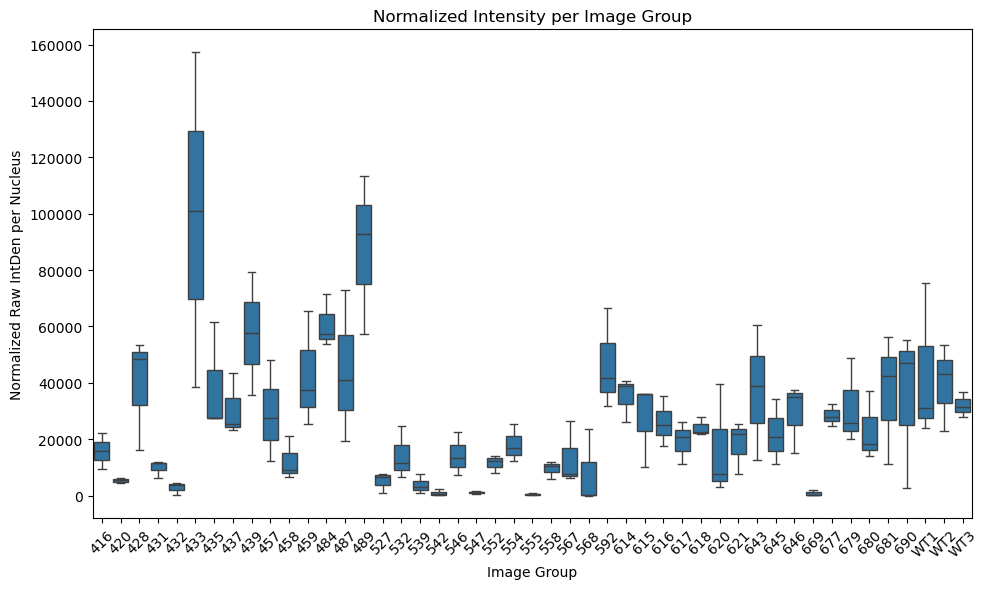

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Normalized', data=df)
plt.xlabel('Image Group')
plt.ylabel('Normalized Raw IntDen per Nucleus')
plt.title('Normalized Intensity per Image Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
data4 = pd.read_csv("/Users/luizmaniero/Documents/DataScience/HMRI_IHC_colab/20250503_bGAL_results/bGAL_Results_20250503.csv")
data5 = pd.read_csv("/Users/luizmaniero/Documents/DataScience/HMRI_IHC_colab/20250701_bGAL_results/bGAL_Nuclei_count_20250107.csv")


In [16]:
data4.head

<bound method NDFrame.head of                                                       Label   Area   Mean  \
0      1  Image_B_Gal_416_-_20x_BF_02_crop_1_Colour_3_ma...  11502  255.0   
1      2  Image_B_Gal_416_-_20x_BF_02_crop_2_Colour_3_ma...   3234  255.0   
2      3  Image_B_Gal_416_-_20x_BF_02_crop_3_Colour_3_ma...   4375  255.0   
3      4  Image_B_Gal_420_-_20x_BF_02_crop_1_Colour_3_ma...    390  255.0   
4      5  Image_B_Gal_420_-_20x_BF_02_crop_2_Colour_3_ma...    156  255.0   
..   ...                                                ...    ...    ...   
136  137  Image_B_Gal_WT2_-_20x_BF_02_crop_2_Colour_3_ma...      0    NaN   
137  138  Image_B_Gal_WT2_-_20x_BF_02_crop_3_Colour_3_ma...      8  255.0   
138  139  Image_B_Gal_WT3_-_20x_BF_02_crop_1_Colour_3_ma...      0    NaN   
139  140  Image_B_Gal_WT3_-_20x_BF_02_crop_2_Colour_3_ma...     92  255.0   
140  141  Image_B_Gal_WT3_-_20x_BF_02_crop_3_Colour_3_ma...     34  255.0   

        IntDen  Median  %Area  RawIntDen  Min

In [17]:
# === 2. Extract the common image ID from filenames ===
data4['ImageID'] = data4['Label'].str.extract(r'(Image_B_Gal_.*?_crop_\d)')
data5['ImageID'] = data5['Slice'].str.extract(r'(Image_B_Gal_.*?_crop_\d)')

# === 3. Merge on the extracted ID ===
m_df = pd.merge(data4, data5, on='ImageID', how='inner', suffixes=('_bGAL', '_nuclei'))

# === 4. Save or display the result ===
#m_df.to_csv("merged_bGAL.csv", index=False)

In [18]:
m_df.head(10)

,,Label,Area,Mean,IntDen,Median,%Area_bGAL,RawIntDen,MinThr,MaxThr,ImageID,Slice,Count,Total Area,Average Size,%Area_nuclei,Perim.
0,1,Image_B_Gal_416_-_20x_BF_02_crop_1_Colour_3_ma...,11502,255.0,2933010.0,255.0,4.225,2933010.0,255,255,Image_B_Gal_416_-_20x_BF_02_crop_1,Image_B_Gal_416_-_20x_BF_02_crop_1_Colour_1_ma...,27,16173,599.000,5.940,89.860
1,2,Image_B_Gal_416_-_20x_BF_02_crop_2_Colour_3_ma...,3234,255.0,824670.0,255.0,1.177,824670.0,255,255,Image_B_Gal_416_-_20x_BF_02_crop_2,Image_B_Gal_416_-_20x_BF_02_crop_2_Colour_1_ma...,52,26631,512.135,9.694,82.670
2,3,Image_B_Gal_416_-_20x_BF_02_crop_3_Colour_3_ma...,4375,255.0,1115625.0,255.0,1.593,1115625.0,255,255,Image_B_Gal_416_-_20x_BF_02_crop_3,Image_B_Gal_416_-_20x_BF_02_crop_3_Colour_1_ma...,0,0,NaN,0.000,NaN
3,4,Image_B_Gal_420_-_20x_BF_02_crop_1_Colour_3_ma...,390,255.0,99450.0,255.0,0.142,99450.0,255,255,Image_B_Gal_420_-_20x_BF_02_crop_1,Image_B_Gal_420_-_20x_BF_02_crop_1_Colour_1_ma...,71,37623,529.901,13.695,83.852
4,5,Image_B_Gal_420_-_20x_BF_02_crop_2_Colour_3_ma...,156,255.0,39780.0,255.0,0.057,39780.0,255,255,Image_B_Gal_420_-_20x_BF_02_crop_2,Image_B_Gal_420_-_20x_BF_02_crop_2_Colour_1_ma...,58,36862,635.552,13.418,92.161
5,6,Image_B_Gal_420_-_20x_BF_02_crop_3_Colour_3_ma...,613,255.0,156315.0,255.0,0.223,156315.0,255,255,Image_B_Gal_420_-_20x_BF_02_crop_3,Image_B_Gal_420_-_20x_BF_02_crop_3_Colour_1_ma...,65,39765,611.769,14.474,92.229
6,7,Image_B_Gal_428_-_20x_BF_02_crop_1_Colour_3_ma...,105,255.0,26775.0,255.0,0.038,26775.0,255,255,Image_B_Gal_428_-_20x_BF_02_crop_1,Image_B_Gal_428_-_20x_BF_02_crop_1_Colour_1_ma...,29,23816,821.241,8.669,103.822
7,8,Image_B_Gal_428_-_20x_BF_02_crop_2_Colour_3_ma...,932,255.0,237660.0,255.0,0.339,237660.0,255,255,Image_B_Gal_428_-_20x_BF_02_crop_2,Image_B_Gal_428_-_20x_BF_02_crop_2_Colour_1_ma...,49,24398,497.918,8.881,82.485
8,9,Image_B_Gal_428_-_20x_BF_02_crop_3_Colour_3_ma...,589,255.0,150195.0,255.0,0.214,150195.0,255,255,Image_B_Gal_428_-_20x_BF_02_crop_3,Image_B_Gal_428_-_20x_BF_02_crop_3_Colour_1_ma...,51,33711,661.000,12.271,94.724
9,10,Image_B_Gal_431_-_20x_BF_02_crop_1_Colour_3_ma...,22,255.0,5610.0,255.0,0.008,5610.0,255,255,Image_B_Gal_431_-_20x_BF_02_crop_1,Image_B_Gal_431_-_20x_BF_02_crop_1_Colour_1_ma...,26,20845,801.731,7.588,102.143


In [19]:
df_b = m_df[['ImageID', 'Count', 'RawIntDen']]
df_b['Normalized'] = (df_b['RawIntDen']/df_b['Count']).round(2)
df_b['Group'] = df_b['ImageID'].str.extract(r'_B_Gal_([A-Za-z0-9]+)_')[0]


/var/folders/fk/3y6t2wps21bb7h_0r4p99ccc0000gn/T/ipykernel_5984/2650477276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['Normalized'] = (df_b['RawIntDen']/df_b['Count']).round(2)
/var/folders/fk/3y6t2wps21bb7h_0r4p99ccc0000gn/T/ipykernel_5984/2650477276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['Group'] = df_b['ImageID'].str.extract(r'_B_Gal_([A-Za-z0-9]+)_')[0]


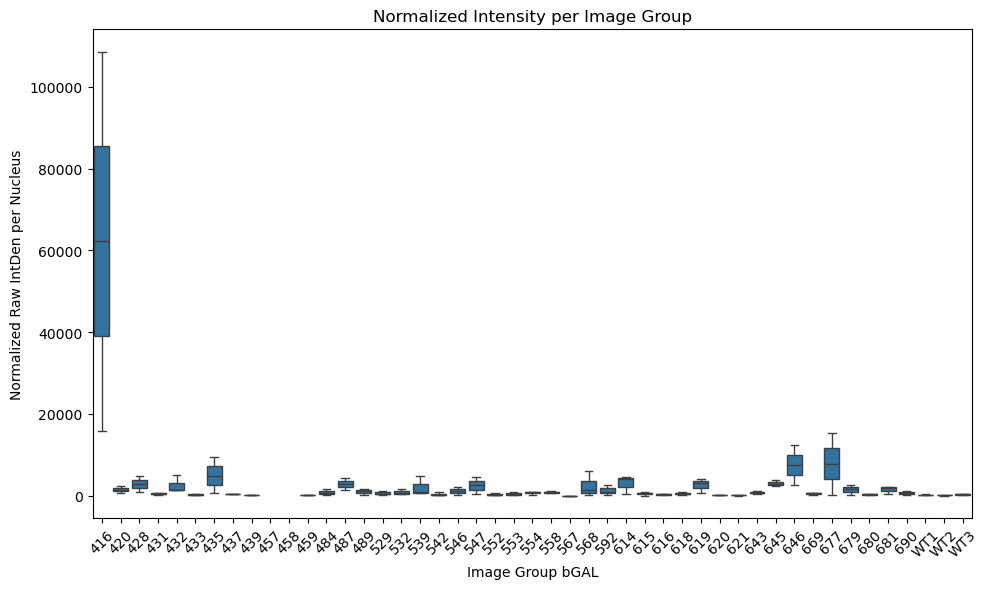

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Normalized', data=df_b)
plt.xlabel('Image Group bGAL')
plt.ylabel('Normalized Raw IntDen per Nucleus')
plt.title('Normalized Intensity per Image Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

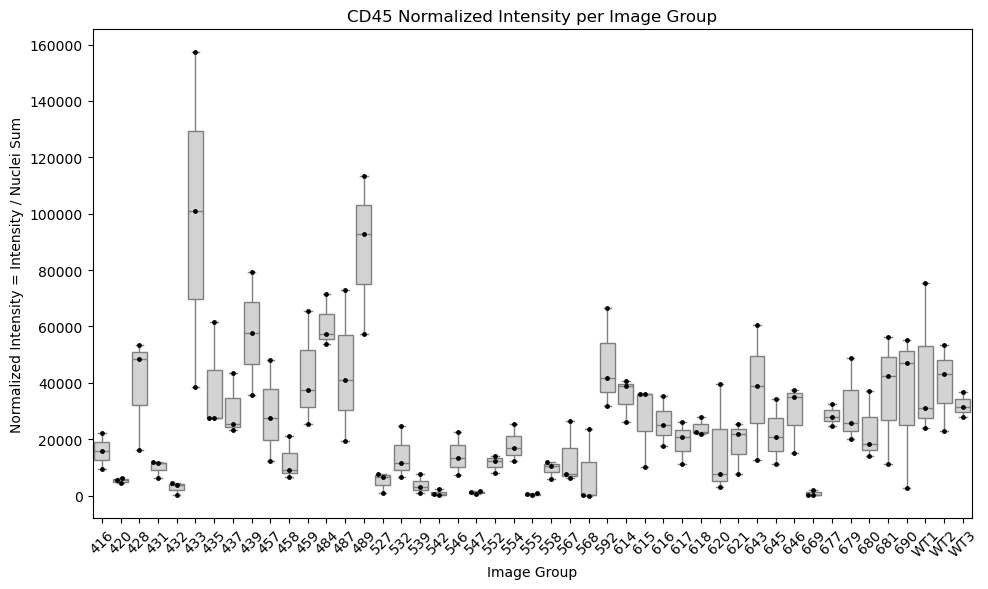

In [33]:
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(x='Group', y='Normalized', data=df, color='lightgray', showfliers=False)
sns.swarmplot(x='Group', y='Normalized', data=df, color='black', size=3.5)

plt.xlabel('Image Group')
plt.ylabel('Normalized Intensity = Intensity / Nuclei Sum')
plt.title('CD45 Normalized Intensity per Image Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


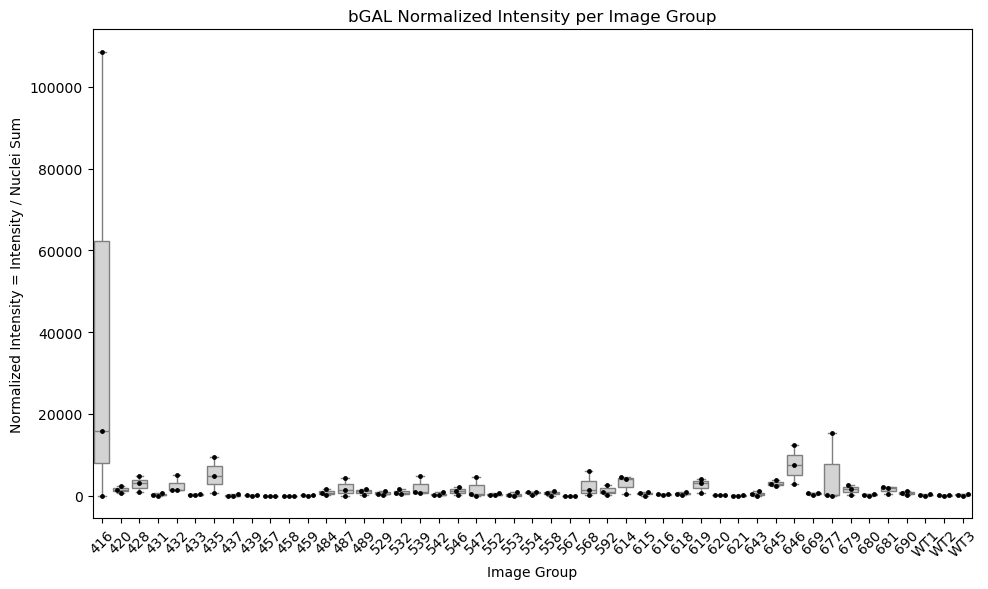

In [32]:
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(x='Group', y='Normalized', data=df_b, color='lightgray', showfliers=False)
sns.swarmplot(x='Group', y='Normalized', data=df_b, color='black', size=3.5)

plt.xlabel('Image Group')
plt.ylabel('Normalized Intensity = Intensity / Nuclei Sum')
plt.title('bGAL Normalized Intensity per Image Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
# === 4. Save or display the result ===
df.to_csv("20250702_cd45_normalized.csv", index=False)
# === 4. Save or display the result ===
df_b.to_csv("20250702_bGAL_normalized.csv", index=False)

In [26]:
df_b.head(15)

,ImageID,Count,RawIntDen,Normalized,Group
0,Image_B_Gal_416_-_20x_BF_02_crop_1,27,2933010.0,108630.00,416
1,Image_B_Gal_416_-_20x_BF_02_crop_2,52,824670.0,15859.04,416
2,Image_B_Gal_416_-_20x_BF_02_crop_3,0,1115625.0,0.00,416
3,Image_B_Gal_420_-_20x_BF_02_crop_1,71,99450.0,1400.70,420
4,Image_B_Gal_420_-_20x_BF_02_crop_2,58,39780.0,685.86,420
5,Image_B_Gal_420_-_20x_BF_02_crop_3,65,156315.0,2404.85,420
6,Image_B_Gal_428_-_20x_BF_02_crop_1,29,26775.0,923.28,428
7,Image_B_Gal_428_-_20x_BF_02_crop_2,49,237660.0,4850.20,428
8,Image_B_Gal_428_-_20x_BF_02_crop_3,51,150195.0,2945.00,428
9,Image_B_Gal_431_-_20x_BF_02_crop_1,26,5610.0,215.77,431


In [25]:
# Replace inf and -inf with NaN first
df_b['Normalized'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Then replace NaN with 0
df_b['Normalized'].fillna(0, inplace=True)

/var/folders/fk/3y6t2wps21bb7h_0r4p99ccc0000gn/T/ipykernel_5984/3106051861.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_b['Normalized'].replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/fk/3y6t2wps21bb7h_0r4p99ccc0000gn/T/ipykernel_5984/3106051861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['Normalized'].repl